In [1]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
## 读取数据
data = pd.read_csv("./housingPrice/housing.data.txt",sep="\t",header=None,names=['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV'])
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [3]:
y_data = data["MEDV"].values
x_data = data.drop("MEDV",axis=1).values

In [4]:
print(x_data.shape,y_data.shape)

(506, 13) (506,)


In [5]:
x_train,x_test,y_train,y_test = train_test_split(x_data,y_data,test_size=0.2,random_state=1)
knr = KNeighborsRegressor(5,weights='distance')
knr.fit(x_train,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=5, p=2,
          weights='distance')

In [6]:
pretd= knr.predict(x_test)

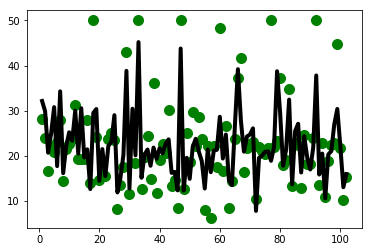

In [7]:
x = range(1,len(y_test)+1)

plt.scatter(x,y_test,c='g',label='data',s=100)
plt.plot(x,pretd,c='k',label='predi',lw=4)
plt.show()

(array([ 3.,  1.,  7.,  7.,  3.,  6.,  8., 10.,  8., 23., 15., 19., 14.,
        16., 18., 28., 36., 29., 33., 28., 37., 21., 15.,  4.,  7., 11.,
         9.,  9.,  5.,  7.,  7.,  8.,  2.,  8.,  5.,  4.,  2.,  1.,  1.,
         0.,  2.,  2.,  2.,  2.,  2.,  1.,  1.,  0.,  3., 16.]),
 array([ 5. ,  5.9,  6.8,  7.7,  8.6,  9.5, 10.4, 11.3, 12.2, 13.1, 14. ,
        14.9, 15.8, 16.7, 17.6, 18.5, 19.4, 20.3, 21.2, 22.1, 23. , 23.9,
        24.8, 25.7, 26.6, 27.5, 28.4, 29.3, 30.2, 31.1, 32. , 32.9, 33.8,
        34.7, 35.6, 36.5, 37.4, 38.3, 39.2, 40.1, 41. , 41.9, 42.8, 43.7,
        44.6, 45.5, 46.4, 47.3, 48.2, 49.1, 50. ]),
 <a list of 50 Patch objects>)

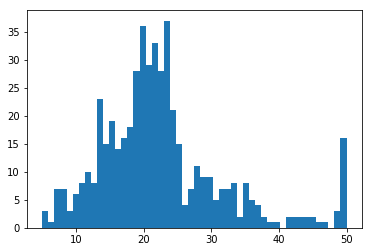

In [8]:
y = data["MEDV"].values.ravel()
x = np.linspace(min(y),max(y),len(y)).ravel()
plt.hist(y,50)

In [9]:
type(x_test)

numpy.ndarray

In [10]:
import pandas as pd
x_p = pd.DataFrame(x_test)
y_p = pd.DataFrame(y_test)
x_p["label"] = y_p
# x_p.head()
# help(x_p.sort_values)
x_p_s = x_p.sort_values("label",inplace=False)

In [11]:
x_p_s.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,label
56,9.91655,0.0,18.10,0.0,0.693,5.852,77.8,1.5004,24.0,666.0,20.2,338.16,29.97,6.3
54,0.20746,0.0,27.74,0.0,0.609,5.093,98.0,1.8226,4.0,711.0,20.1,318.43,29.68,8.1
25,15.86030,0.0,18.10,0.0,0.679,5.896,95.4,1.9096,24.0,666.0,20.2,7.68,24.39,8.3
45,11.81230,0.0,18.10,0.0,0.718,6.824,76.5,1.7940,24.0,666.0,20.2,48.45,22.74,8.4
62,7.67202,0.0,18.10,0.0,0.693,5.747,98.9,1.6334,24.0,666.0,20.2,393.10,19.92,8.5


In [12]:
s_y_test = x_p_s["label"].values
s_x_test = x_p_s.drop("label",axis=1).values
x_num = np.linspace(1,1000,len(s_y_test)) # range(1,len(s_y_test)+1,3)

In [13]:
s_y_pred = knr.predict(s_x_test)

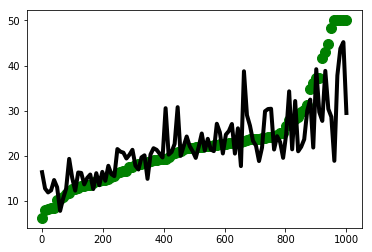

In [14]:
plt.scatter(x_num,s_y_test,c='g',s=100)
plt.plot(x_num,s_y_pred,c='k',lw=4)
plt.show()

In [15]:
np.sqrt(np.sum((s_y_test-s_y_pred)**2))

64.920124206116

In [16]:
# help(KNeighborsRegressor)

In [17]:
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
x_data = mm.fit_transform(x_data)
x_train,x_test,y_train,y_test = train_test_split(x_data,y_data,test_size=0.1)
x_test = pd.DataFrame(x_test)
x_test["label"] = pd.DataFrame(y_test)
x_test.sort_values("label",inplace=True)
y_test = x_test["label"].values
x_test = x_test.drop("label",axis=1).values

In [18]:
knnh = KNeighborsRegressor(n_neighbors=5)
knnh.fit(x_train,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=5, p=2,
          weights='uniform')

In [19]:
predh = knnh.predict(x_test)

In [20]:
np.sqrt(np.sum((predh-y_test)**2))

40.87511223226182

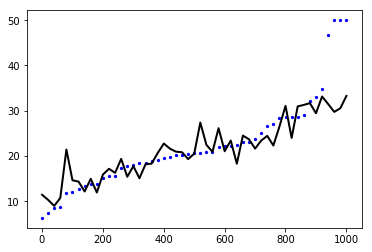

In [21]:
x = np.linspace(1,1000,len(y_test))
plt.scatter(x,y_test,c='b',s=5)
plt.plot(x,predh,c='k',lw=2)
plt.show()

In [22]:
#特征选择
from sklearn.feature_selection import VarianceThreshold
vt = VarianceThreshold(0.1)
vt.fit_transform(x_data,y_data)
vt.get_support(True)

array([8, 9], dtype=int64)

In [23]:
y_data = data["MEDV"].values
x_data = data.drop("MEDV",axis=1).values
mm = MinMaxScaler()
x_data = mm.fit_transform(x_data)

In [24]:
x_data.shape

(506, 13)

In [25]:
#卡方
from sklearn.feature_selection import SelectKBest,f_regression
select = SelectKBest(f_regression,k=3)
select.fit_transform(x_data,y_data)
select.get_support(True)

array([ 5, 10, 12], dtype=int64)

In [26]:
x_data = x_data[:,[ 5, 10, 12]]
x_data.shape

(506, 3)

In [27]:
x_train,x_test,y_train,y_test = train_test_split(x_data,y_data,test_size=0.1)
x_test = pd.DataFrame(x_test)
x_test["label"] = pd.DataFrame(y_test)
x_test.sort_values("label",inplace=True)
y_test = x_test["label"].values
x_test = x_test.drop("label",axis=1).values
knnh = KNeighborsRegressor(n_neighbors=5)
knnh.fit(x_train,y_train)
predh = knnh.predict(x_test)
np.sqrt(np.sum((predh-y_test)**2))

36.209611983560386

In [28]:
#再次优化
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [29]:
#1.选择特征
#2.归一化（或者标准化）
#3.训练
#4.评估
#5.筛选
from  sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

def feture_choice(x_data,y_data):
    choice = SelectKBest(f_regression,k=3)
    choice.fit_transform(x_data,y_data)
    return choice.get_support(True)

def nomalization_feture(x_train,x_test):
    stand = StandardScaler()
    stand_train = stand.fit_transform(x_train)
    stand_test = stand.transform(x_test)
    return (stand_train,stand_test)

def nomalization_feture2(x_train,x_test):
    stand = MinMaxScaler()
    stand_train = stand.fit_transform(x_train)
    stand_test = stand.transform(x_test)
    return (stand_train,stand_test)

def sort_y(x_data,y_data):
    x_data["label"] = y_data
    x_data.sort_values("label",inplace=True)
    return (x_data.drop("label",axis=1).values,x_data["label"].values)

def evaluate(y_test,y_pred):
    ev1 = mean_squared_error(y_test,y_pred)
    ev2 = np.sqrt(np.sum((y_test-y_pred)**2))
    return (ev1,ev2)

def plot_yp(y_test,y_pred):
    x = np.linspace(1,1000,len(y_pred))
    plt.scatter(x,y_test,c='b',s=15)
    plt.scatter(x,y_pred,c='g',s=20)
    plt.show()


In [30]:
y_data = data["MEDV"].values
x_data = data.drop("MEDV",axis=1).values
x_train,x_test,y_train,y_test = train_test_split(x_data,y_data,test_size=0.3,random_state=321)

In [31]:
print(x_train.shape,y_train.shape)
no_x_train,no_x_test = nomalization_feture2(x_train,x_test)
feture_index = feture_choice(no_x_train,y_train)
no_x_train = no_x_train[:,feture_index]
no_x_test = no_x_test[:,feture_index]
knr = KNeighborsRegressor(5)
knr.fit(no_x_train,y_train)
no_x_test,y_test = sort_y(pd.DataFrame(no_x_test),pd.DataFrame(y_test))
y_pred = knr.predict(no_x_test)
y_pred

(354, 13) (354,)


array([ 7.5 , 12.66,  9.96, 10.44, 15.46, 14.64,  8.68,  9.  ,  9.02,
       12.22, 15.32, 20.68, 11.46, 10.8 , 11.94, 16.2 , 11.94, 18.7 ,
       14.48, 15.04, 11.04, 12.68, 11.38, 18.18, 12.44, 17.18, 15.84,
       14.06, 13.5 , 14.8 , 14.02, 14.7 , 20.92, 13.54, 19.4 , 19.3 ,
       20.  , 21.18, 14.5 , 19.92, 15.04, 11.94, 13.12, 13.22, 16.66,
       20.5 , 18.04, 14.82, 16.78, 20.64, 19.76, 19.74, 15.84, 20.92,
       23.72, 18.94, 19.36, 20.7 , 16.7 , 24.72, 14.12, 12.84, 21.38,
       15.3 , 17.92, 20.86, 21.36, 20.64, 19.88, 20.9 , 18.66, 20.42,
       21.8 , 18.48, 20.64, 20.66, 19.62, 20.22, 20.76, 21.58, 21.62,
       23.54, 27.1 , 20.6 , 20.74, 18.68, 22.42, 20.3 , 43.32, 23.02,
       21.  , 23.26, 21.62, 25.48, 25.94, 25.04, 23.66, 24.32, 22.98,
       14.06, 24.76, 25.52, 24.16, 28.64, 24.42, 21.28, 22.66, 21.34,
       24.96, 19.72, 23.1 , 26.2 , 23.52, 23.62, 22.1 , 24.68, 27.74,
       30.24, 23.18, 13.38, 28.62, 27.96, 21.7 , 27.38, 25.4 , 29.66,
       28.24, 33.32,

In [32]:
evaluate(y_test=y_test,y_pred=y_pred)

(20.032642105263154, 55.18117070160799)

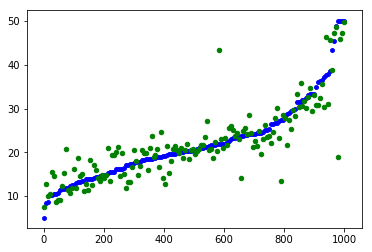

In [33]:
plot_yp(y_test,y_pred)

In [34]:
for i,y in enumerate(y_test):
    print(y,"  ",y_pred[i])

5.0    7.5
8.4    12.66
8.7    9.96
10.2    10.440000000000001
10.2    15.460000000000003
10.4    14.64
10.5    8.680000000000001
10.8    9.000000000000002
11.3    9.02
11.5    12.220000000000002
11.7    15.319999999999999
11.9    20.68
11.9    11.459999999999999
12.3    10.8
12.5    11.940000000000001
12.6    16.2
13.0    11.940000000000001
13.1    18.7
13.3    14.479999999999999
13.4    15.040000000000001
13.4    11.040000000000001
13.8    12.680000000000001
13.8    11.379999999999999
13.8    18.18
14.0    12.440000000000001
14.1    17.18
14.3    15.84
14.4    14.059999999999999
14.5    13.5
14.5    14.8
14.9    14.020000000000001
14.9    14.7
15.3    20.919999999999998
15.4    13.540000000000001
15.6    19.4
15.6    19.3
16.1    20.0
16.1    21.18
16.2    14.5
16.2    19.92
16.5    15.040000000000001
17.1    11.940000000000001
17.2    13.120000000000001
17.3    13.219999999999999
17.4    16.66
17.5    20.5
17.7    18.04
17.8    14.819999999999999
17.8    16.78
18.3    20.63999999999

In [35]:
print(y_test.mean(),y_pred.mean())

22.29407894736842 22.094868421052627


In [36]:
from sklearn.model_selection import GridSearchCV
param_grid=[
    {
        'weights':['uniform'],
        'n_neighbors':[k for k in range(1,11)]
    },
    {
        'weights':['distance'],
        'n_neighbors':[k for k in range(1,11)],
        'p':[p for p in range(1,11)]
    }
]

knr_gs = KNeighborsRegressor()
grid_search = GridSearchCV(knr_gs,param_grid=param_grid)
grid_search.fit(no_x_train,y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=5, p=2,
          weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'weights': ['uniform'], 'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}, {'weights': ['distance'], 'p': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [37]:
knr_gs= grid_search.best_estimator_

In [38]:
grid_search.best_params_

{'n_neighbors': 6, 'p': 1, 'weights': 'distance'}

In [39]:
g_y_pred = knr_gs.predict(no_x_test)

In [40]:
evaluate(g_y_pred,y_test)

(19.778452397586687, 54.82996228735869)

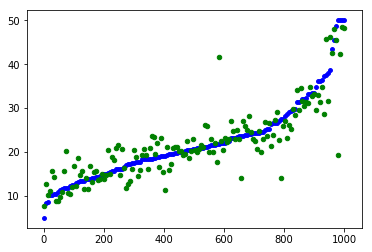

In [41]:
plot_yp(y_test,g_y_pred)

In [42]:
print(y_test.mean(),g_y_pred.mean())

22.29407894736842 22.138845191243576


In [43]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [48]:
data["NOX"].value_counts()

0.5380    23
0.7130    18
0.4370    17
0.8710    16
0.4890    15
0.6240    15
0.6930    14
0.6050    14
0.7400    13
0.5440    12
0.7000    11
0.5200    11
0.6470    10
0.5070    10
0.4310    10
0.4480     9
0.5470     9
0.4880     8
0.4640     8
0.4930     8
0.7700     8
0.4280     8
0.5040     8
0.5850     8
0.5840     8
0.5150     8
0.6790     8
0.5240     7
0.5810     7
0.6140     7
          ..
0.4429     4
0.4000     4
0.4050     3
0.4100     3
0.6550     3
0.4090     3
0.4290     3
0.4580     3
0.4330     3
0.4040     3
0.6680     3
0.4161     3
0.4010     3
0.4030     3
0.4600     3
0.4420     3
0.5750     2
0.3980     2
0.4690     2
0.4840     2
0.3920     2
0.4150     2
0.6590     2
0.4379     2
0.4350     1
0.3850     1
0.3940     1
0.5180     1
0.4220     1
0.3890     1
Name: NOX, Length: 81, dtype: int64